In [1]:
import tensorflow as tf

from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

number_of_datapoints = 100

x = np.random.uniform(low=-5, high=5, size=(number_of_datapoints, 1))

x[:5, :].round(2)

array([[-0.72],
       [-1.38],
       [ 3.42],
       [-0.8 ],
       [-1.89]])

In [2]:
y = np.random.uniform(-5, 5, size=(number_of_datapoints, 1))

noise = np.random.uniform(low=-1, high=1, size=(number_of_datapoints, 1))

input = np.column_stack((x, y))

In [3]:
model = keras.Sequential([
    keras.layers.Dense(units=1)
])

2022-02-25 16:25:55.500220: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

In [5]:
from keras.callbacks import History

history = History()
z = 7 * x + 6 * y + 5 + noise

model.fit(input, z, epochs=15, verbose=1, validation_split=0.2, callbacks=[history])

Epoch 1/15
3/3 [==============================] - 0s 62ms/step - loss: 402.2726 - mse: 402.2726 - val_loss: 259.4359 - val_mse: 259.4359
Epoch 2/15
3/3 [==============================] - 0s 9ms/step - loss: 193.3337 - mse: 193.3337 - val_loss: 118.0887 - val_mse: 118.0887
Epoch 3/15
3/3 [==============================] - 0s 10ms/step - loss: 93.2775 - mse: 93.2775 - val_loss: 56.7342 - val_mse: 56.7342
Epoch 4/15
3/3 [==============================] - 0s 10ms/step - loss: 49.6946 - mse: 49.6946 - val_loss: 30.5385 - val_mse: 30.5385
Epoch 5/15
3/3 [==============================] - 0s 9ms/step - loss: 29.4362 - mse: 29.4362 - val_loss: 19.0938 - val_mse: 19.0938
Epoch 6/15
3/3 [==============================] - 0s 9ms/step - loss: 19.7363 - mse: 19.7363 - val_loss: 13.5205 - val_mse: 13.5205
Epoch 7/15
3/3 [==============================] - 0s 10ms/step - loss: 14.6350 - mse: 14.6350 - val_loss: 10.5587 - val_mse: 10.5587
Epoch 8/15
3/3 [==============================] - 0s 9ms/step - 

In [6]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


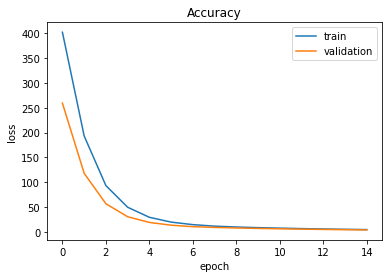

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

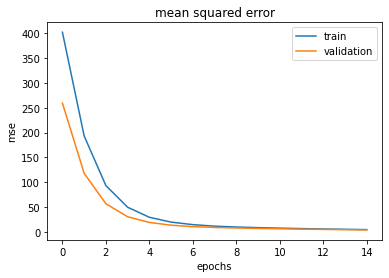

In [8]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(['train' , 'validation'] , loc = 'upper right')
plt.show()

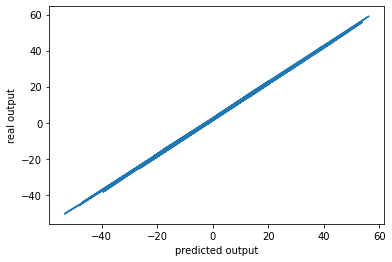

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(input)),
         np.squeeze(z))
plt.xlabel('predicted output')
plt.ylabel('real output')
plt.show()

In [10]:
print("Predicted z for x=2, y=3 ---> ", model.predict([[2,3]]).
      round(2))
print("Expected output: ", 7*2 + 6*3 + 5)

Predicted z for x=2, y=3 --->  [[34.95]]
Expected output:  37
